In [1]:
import matplotlib.pyplot as plt
from modules.preprocessing import simple_preprocessing
from modules.reinforcement import PricingEnvironment, QLearningAgent, train_q_learning, evaluate_agent
from modules.naive_static import naive_static_pricing
from modules.config import N_PRICE_ACTIONS, LEARNING_RATE_RL, DISCOUNT, EPSILON, EPSILON_DECAY, EPISODES, N_EVAL_EPISODES

preprocessor, X, y, categorical_features, numerical_features = simple_preprocessing()
X_transformed = preprocessor.fit_transform(X)

In [2]:
price_min = y.min() * 0.8  
price_max = y.max() * 1.2 

print(f"Using price range: ${price_min:.2f} - ${price_max:.2f}")


Using price range: $20.79 - $1003.34


In [3]:
env = PricingEnvironment(X_transformed, y, cost=0)

agent = QLearningAgent(
    n_price_actions=N_PRICE_ACTIONS,
    price_min=price_min,
    price_max=price_max,
    learning_rate=LEARNING_RATE_RL,
    discount=DISCOUNT,
    epsilon=EPSILON,
    epsilon_decay=EPSILON_DECAY
)

In [4]:
print("Training Q-Learning Agent...")
rewards, profits = train_q_learning(env, agent, episodes=EPISODES)
print("\nEvaluating...")
final_app = evaluate_agent(env, agent, n_eval_episodes=N_EVAL_EPISODES)
print(f"\nFinal Average Profit Per Person (APP): ${final_app:.2f}")

Training Q-Learning Agent...
Episode 100/1000 | Avg APP: 128.72 | Epsilon: 0.606
Episode 200/1000 | Avg APP: 197.98 | Epsilon: 0.367
Episode 300/1000 | Avg APP: 242.25 | Epsilon: 0.222
Episode 400/1000 | Avg APP: 271.50 | Epsilon: 0.135
Episode 500/1000 | Avg APP: 289.36 | Epsilon: 0.082
Episode 600/1000 | Avg APP: 298.92 | Epsilon: 0.049
Episode 700/1000 | Avg APP: 304.96 | Epsilon: 0.030
Episode 800/1000 | Avg APP: 309.07 | Epsilon: 0.018
Episode 900/1000 | Avg APP: 310.95 | Epsilon: 0.011
Episode 1000/1000 | Avg APP: 312.22 | Epsilon: 0.010

Evaluating...

Final Average Profit Per Person (APP): $314.52


In [5]:
optimised_static_app, optimised_price, app_s_train = naive_static_pricing(X, y, preprocessor)

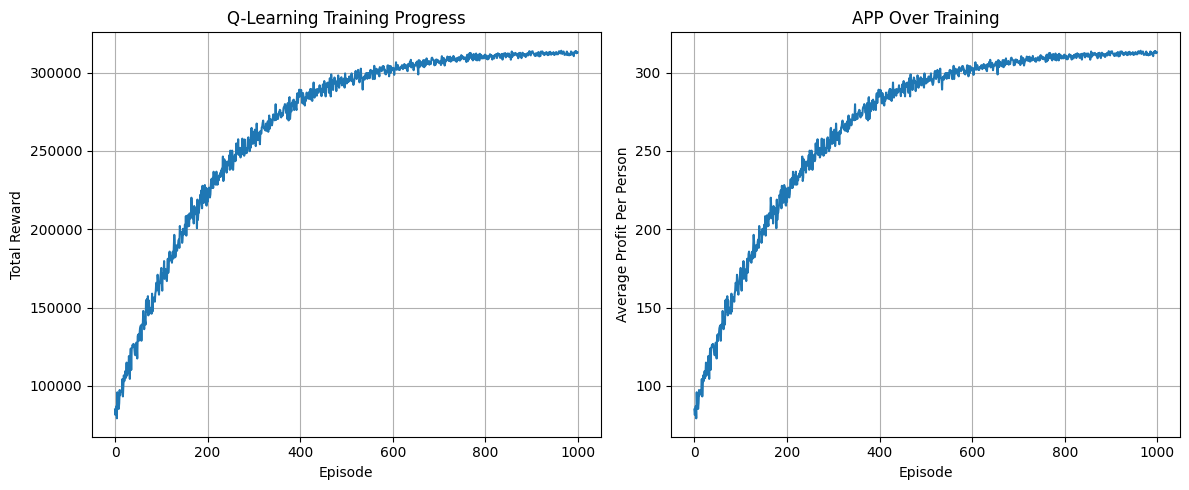


COMPARISON:
Static Pricing (best fixed price):   $182.86
  └─ Optimal price: $279.17
Q-Learning (personalized pricing):    $314.52
Improvement: 72.01%


In [6]:
#learning curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-Learning Training Progress')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(profits)
plt.xlabel('Episode')
plt.ylabel('Average Profit Per Person')
plt.title('APP Over Training')
plt.grid(True)

plt.tight_layout()
plt.show()


print(f"\n{'='*50}")
print(f"COMPARISON:")
print(f"{'='*50}")
print(f"Static Pricing (best fixed price):   ${optimised_static_app:.2f}")
print(f"  └─ Optimal price: ${optimised_price:.2f}")
print(f"Q-Learning (personalized pricing):    ${final_app:.2f}")
print(f"Improvement: {((final_app - optimised_static_app) / optimised_static_app * 100):.2f}%")
